In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Loading the Dataset
In this classification approach we will be using Logistic Regression, Gaussian Naïve Bayes, Linear SVC

In [15]:
bbc_data = pd.read_csv('bbc_news.csv')
print(bbc_data.shape)
bbc_data

(500, 4)


,body,title,filename,category
0,The global web blog community is being called ...,Global blogger action day called,bbc/tech/016.txt,tech
1,"The ""digital divide"" between rich and poor nat...",Global digital divide 'narrowing',bbc/tech/033.txt,tech
2,The current slew of sports games offers unpara...,Sporting rivals go to extra time,bbc/tech/056.txt,tech
3,Writing a Microsoft Word document can be a dan...,Warning over Windows Word files,bbc/tech/086.txt,tech
4,"Aid workers trying to house, feed and clothe m...",Satellite mapping aids Darfur relief,bbc/tech/223.txt,tech
...,...,...,...,...
495,Wales coach Mike Ruddock says England lock Dan...,Wales critical of clumsy Grewcock,bbc/sport/307.txt,sport
496,Tim Henman saved a match point before fighting...,Henman overcomes rival Rusedski,bbc/sport/421.txt,sport
497,Newly-crowned Australian Open champion Marat S...,Safin cool on Wimbledon,bbc/sport/489.txt,sport
498,The International Association of Athletics Fed...,IAAF will contest Greek decision,bbc/sport/081.txt,sport


In [16]:
# Rename the colums title to "News_Headline and body to Content"
bbc_data.rename(columns={'title': 'News_Headline', 'body': 'Content'}, inplace=True)
bbc_data.dropna(axis=1)
bbc_data.shape

(500, 4)

# Visualization of the Dataset

<Axes: xlabel='count', ylabel='category'>

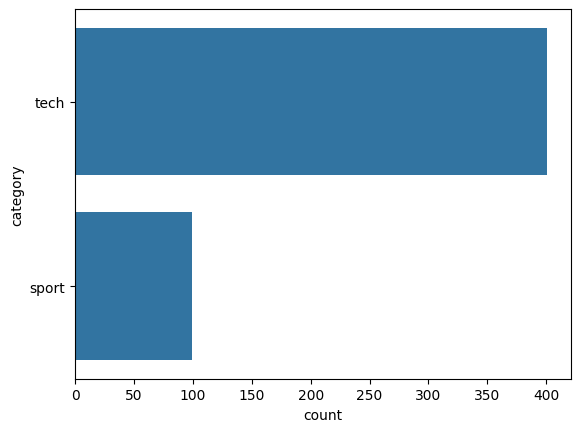

In [20]:
sns.countplot(bbc_data.category)

# Visualize the number of stop words present in our dataset

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sruthipg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


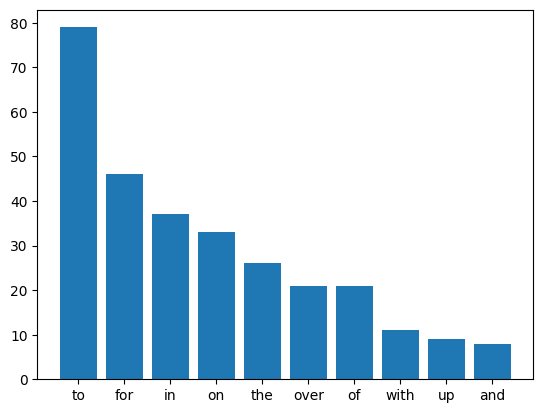

In [25]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def plot_stopwords(data):
    sw_nltk = stopwords.words('english')
    print(sw_nltk)
    data_split= data.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    from collections import defaultdict
    dictionary_stopwords=defaultdict(int)
    for word in corpus:
        if word in sw_nltk:
            dictionary_stopwords[word]+=1
            
    top=sorted(dictionary_stopwords.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)
plot_stopwords(bbc_data['News_Headline'])
